# Portfolio Sector Tear Sheets

In [1]:
# Import new libraries
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import empyrical
import pyfolio as pf

import warnings
warnings.filterwarnings(action='ignore')

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


## Fix Broken Pyfolio Functions

In [2]:
# Replacement functions for broken pyfolio code
def get_max_drawdown_underwater_f(underwater):
    """
    Determines peak, valley, and recovery dates given an 'underwater'
    DataFrame.

    An underwater DataFrame is a DataFrame that has precomputed
    rolling drawdown.

    Parameters
    ----------
    underwater : pd.Series
       Underwater returns (rolling drawdown) of a strategy.

    Returns
    -------
    peak : datetime
        The maximum drawdown's peak.
    valley : datetime
        The maximum drawdown's valley.
    recovery : datetime
        The maximum drawdown's recovery.
    """

    #valley = np.argmin(underwater)  # end of the period
    valley = underwater.index[np.argmin(underwater)] # end of the period

    # Find first 0
    peak = underwater[:valley][underwater[:valley] == 0].index[-1]
    # Find last 0
    try:
        recovery = underwater[valley:][underwater[valley:] == 0].index[0]
    except IndexError:
        recovery = np.nan  # drawdown not recovered
    return peak, valley, recovery

def get_symbol_returns_from_yahoo_f(symbol, start=None, end=None):
    """
    Wrapper for pandas.io.data.get_data_yahoo().
    Retrieves prices for symbol from yahoo and computes returns
    based on adjusted closing prices.

    Parameters
    ----------
    symbol : str
        Symbol name to load, e.g. 'SPY'
    start : pandas.Timestamp compatible, optional
        Start date of time period to retrieve
    end : pandas.Timestamp compatible, optional
        End date of time period to retrieve

    Returns
    -------
    pandas.DataFrame
        Returns of symbol in requested period.
    """

    try:
        px = web.get_data_yahoo(symbol, start=start, end=end)
        px['date'] = px.index.to_list()
        #px['date'] = px['date'].apply(lambda x: pd.Timestamp(x))
        #px['date'] = pd.to_datetime(px['date'])
        #px['date'] = pd.to_datetime(px['date'], unit='s')
        px.set_index('date', drop=False, inplace=True)
        
        #px.index.rename('date',inplace=True)
        rets = px[['Adj Close']].pct_change().dropna()
        rets.rename(columns={"Adj Close": "adjclose"},inplace=True)
    except Exception as e:
        warnings.warn(
            'Yahoo Finance read failed: {}, falling back to Google'.format(e),
            UserWarning)
        px = web.get_data_google(symbol, start=start, end=end)
        rets = px[['Close']].pct_change().dropna()
    if rets.index.tzinfo is None:
        rets.index = rets.index.tz_localize("UTC")
    rets.columns = [symbol]
    return rets

# Overriding broken pyfolio functions
empyrical.utils.get_symbol_returns_from_yahoo = get_symbol_returns_from_yahoo_f
pf.timeseries.get_max_drawdown_underwater = get_max_drawdown_underwater_f

## Information Technology Sector Tear Sheet

In [3]:
# Fetch historical data for Info Tech sector
stock_rets = pf.utils.get_symbol_rets('VGT')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,54.63,2007-10-31,2008-11-20,2011-01-06,832
1,31.84,2020-02-19,2020-03-23,2020-06-09,80
2,23.67,2018-10-03,2018-12-24,2019-03-21,122
3,21.01,2004-02-02,2004-08-12,2005-11-17,469
4,19.64,2011-02-17,2011-08-19,2012-02-01,250


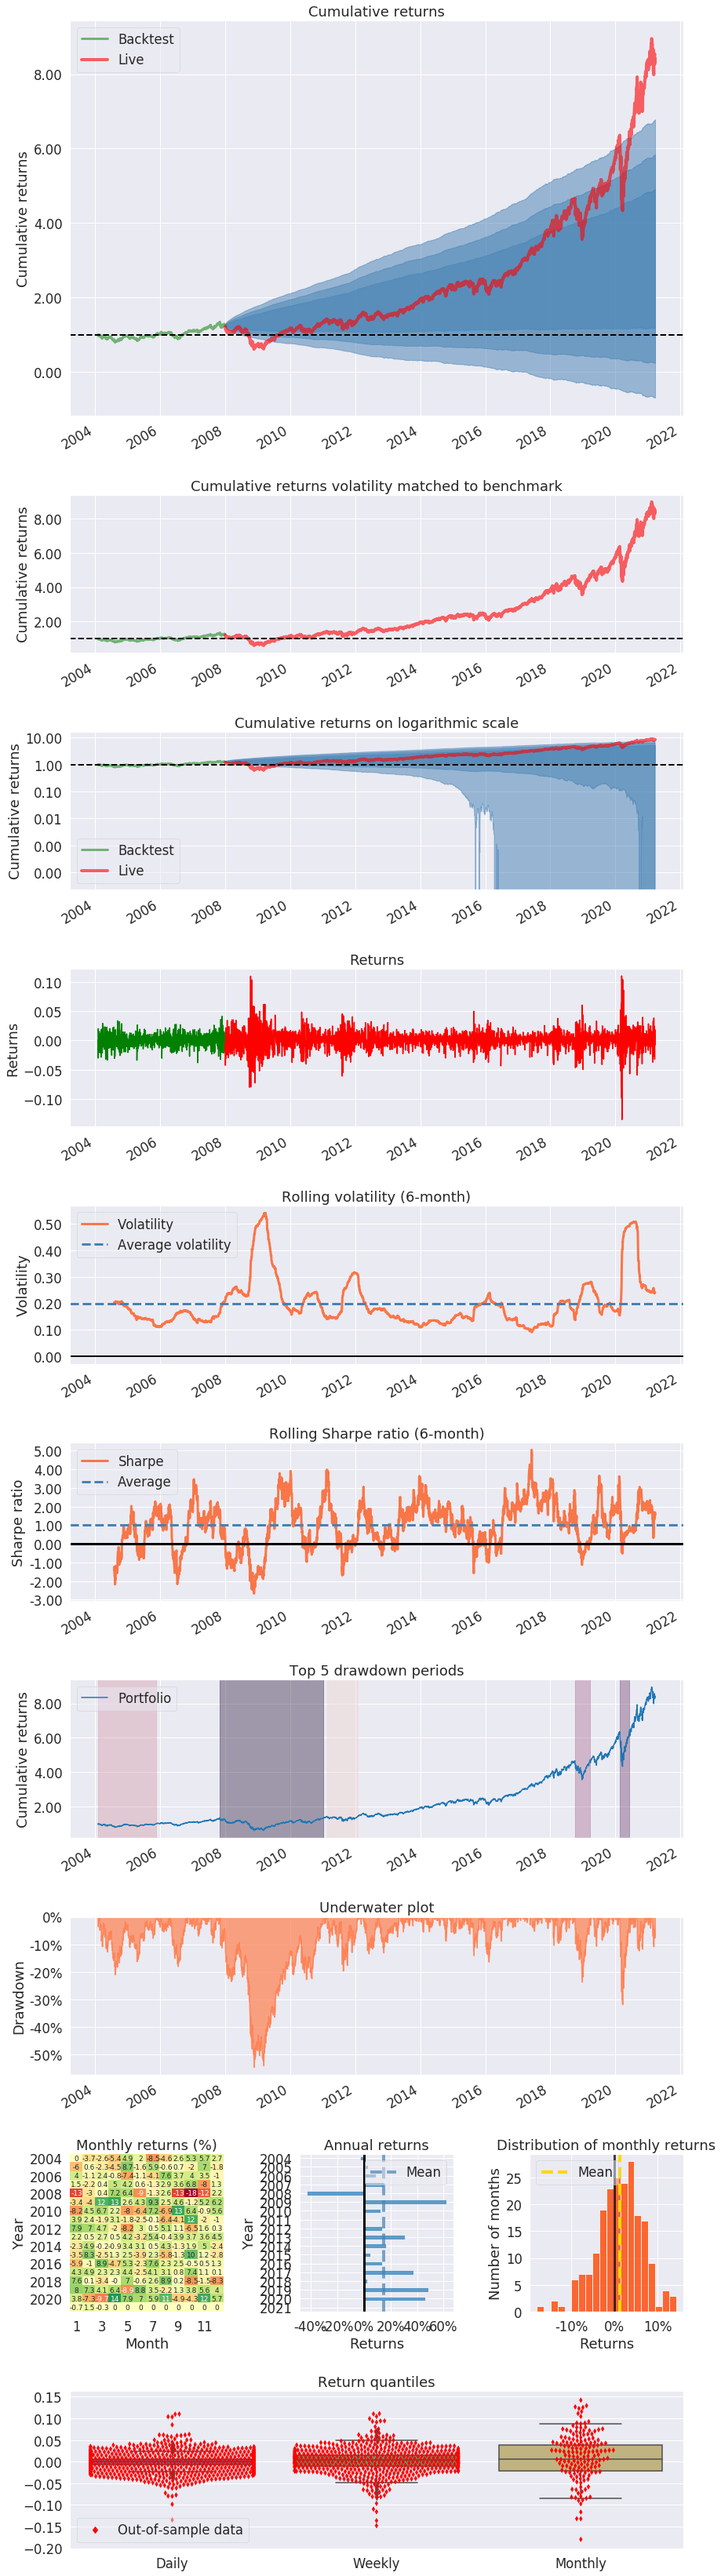

In [4]:
# Create tear sheet for Info Tech sector
pf.create_returns_tear_sheet(stock_rets,live_start_date='2008-01-02')

## Consumer Discretionary Sector Tear Sheet

In [5]:
# Fetch historical data for Consumer Discretionary sector
stock_rets = pf.utils.get_symbol_rets('VCR')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,61.54,2007-06-04,2008-11-20,2011-02-07,961
1,37.68,2020-02-20,2020-03-18,2020-06-08,78
2,22.61,2018-09-04,2018-12-24,2019-04-16,161
3,20.49,2011-07-07,2011-10-03,2012-02-03,152
4,16.70,2015-11-03,2016-02-11,2016-07-12,181


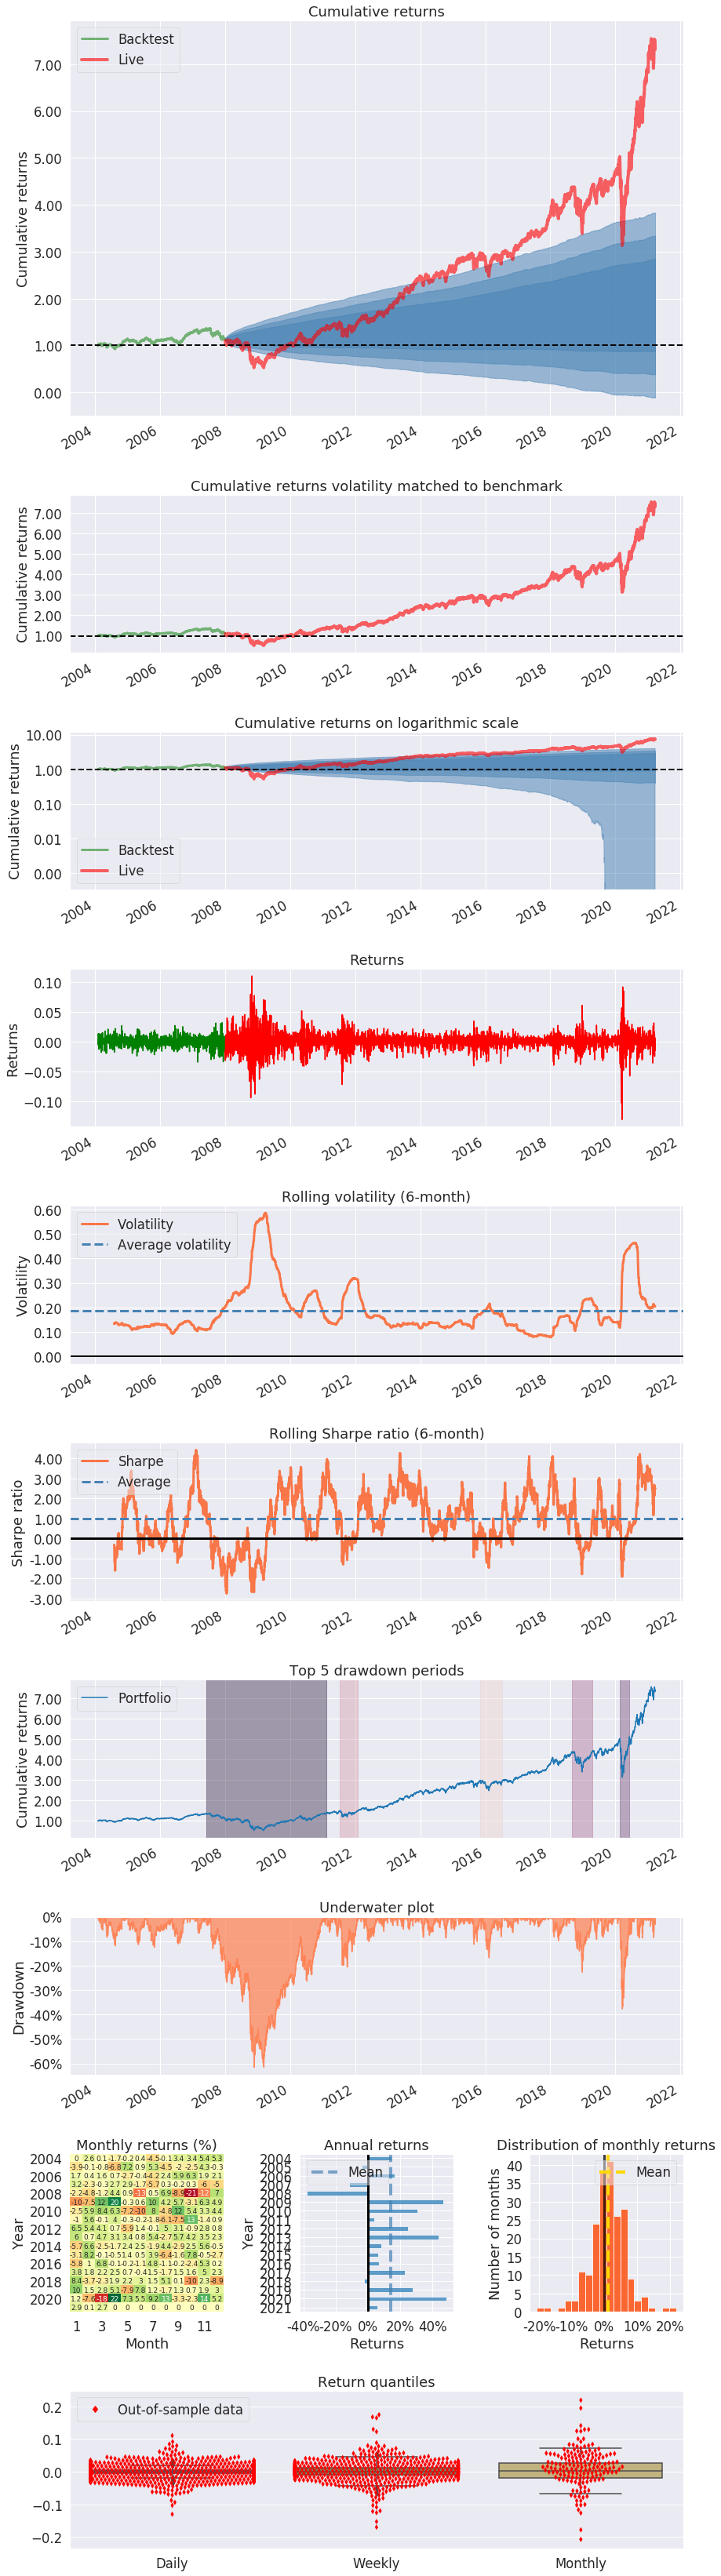

In [6]:
# Create tear sheet for Consumer Discretionary sector
pf.create_returns_tear_sheet(stock_rets,live_start_date='2008-01-02')

## Healthcare Sector Tear Sheet

In [7]:
# Fetch historical data for Healthcare sector
stock_rets = pf.utils.get_symbol_rets('VHT')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.12,2007-12-10,2009-03-05,2011-03-03,844
1,28.85,2020-02-19,2020-03-23,2020-06-08,79
2,20.26,2015-07-20,2016-02-11,2017-06-01,489
3,18.31,2011-05-18,2011-08-08,2012-02-01,186
4,16.97,2018-10-01,2018-12-24,2019-11-08,290


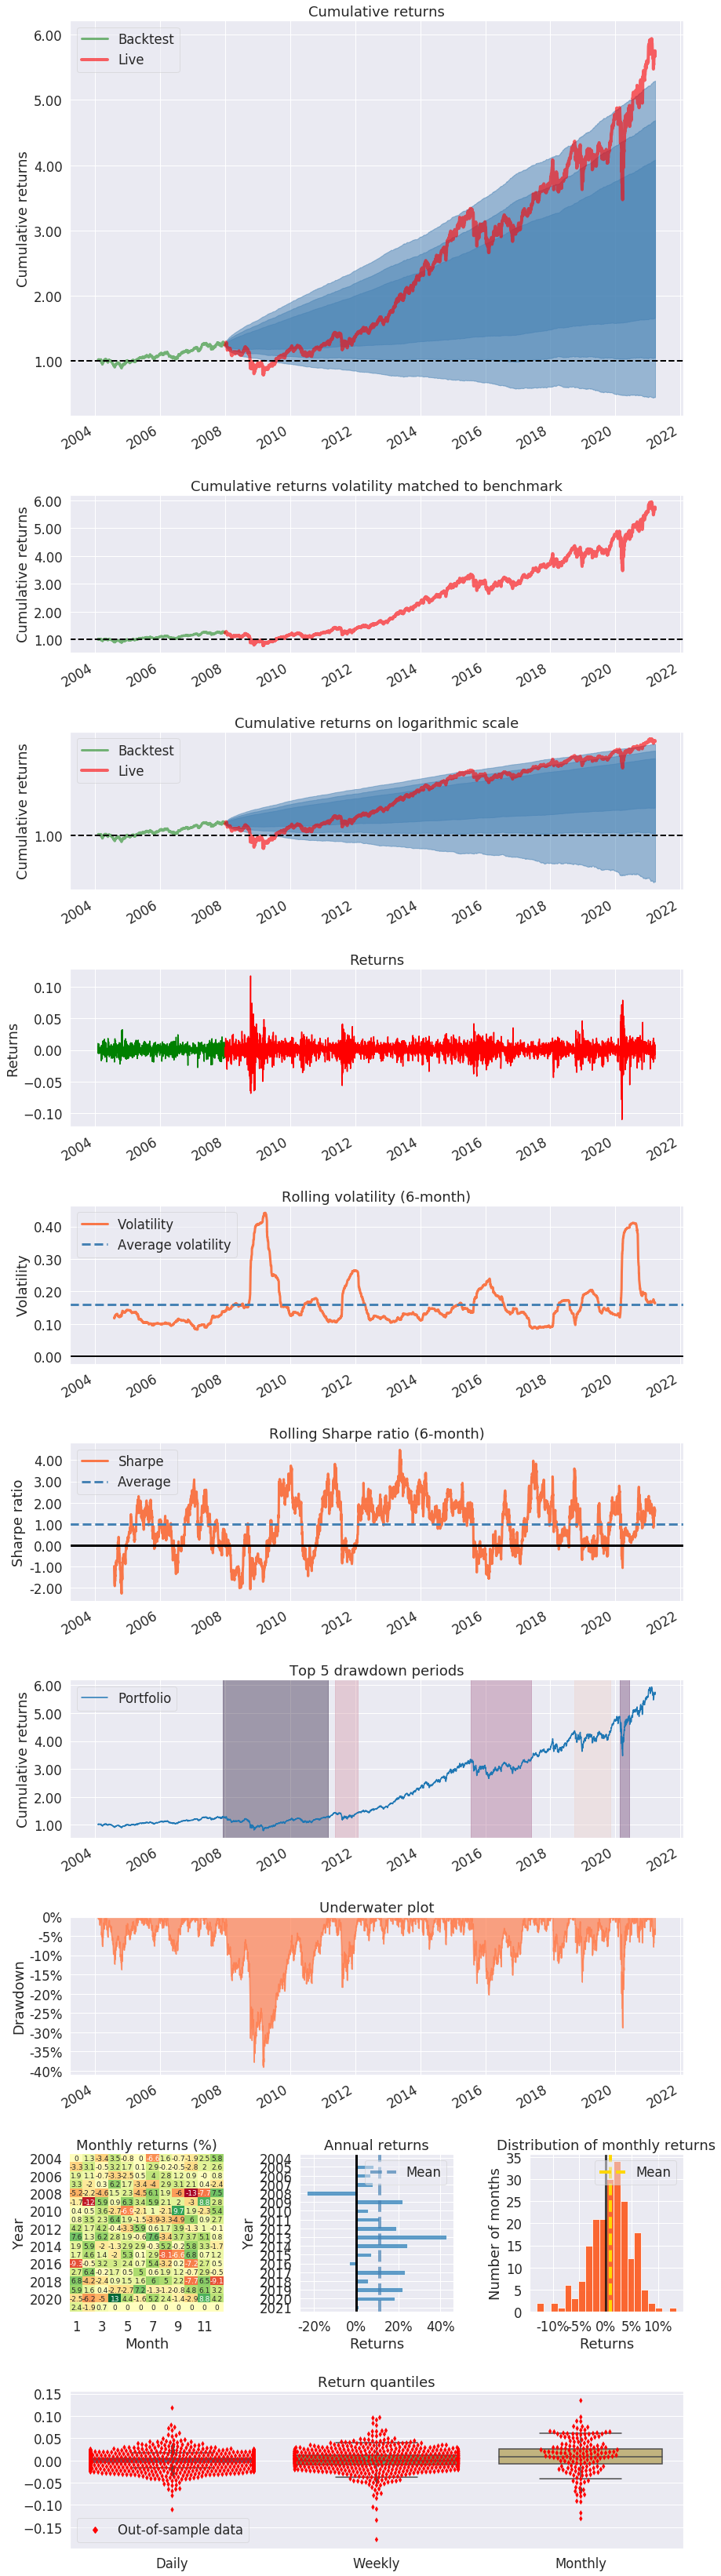

In [8]:
# Create tear sheet for Healthcare sector
pf.create_returns_tear_sheet(stock_rets,live_start_date='2008-01-02')